In [4]:
!pip install timm
!wget https://raw.githubusercontent.com/magureen/pytorch-cnn-visualization/main/cnn_visualize.py
!wget https://raw.githubusercontent.com/magureen/pytorch-cnn-visualization/main/snake.jpg

--2021-10-09 05:27:40--  https://raw.githubusercontent.com/magureen/pytorch-cnn-visualization/main/cnn_visualize.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4554 (4.4K) [text/plain]
Saving to: ‘cnn_visualize.py’

cnn_visualize.py    100%[===================>]   4.45K  --.-KB/s    in 0s      

2021-10-09 05:27:40 (66.3 MB/s) - ‘cnn_visualize.py’ saved [4554/4554]

--2021-10-09 05:27:40--  https://raw.githubusercontent.com/magureen/pytorch-cnn-visualization/main/snake.jpg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 59798 

In [1]:
import timm
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from cnn_visualize import GradCam, SaliencyMap
from cnn_visualize import image_with_colormap, convert_to_grayscale, get_positive_negative_saliency

In [2]:
from torchvision.transforms import ToTensor, Resize, Compose, Normalize
transform = Compose([
                     Resize((224,224)),
                     ToTensor(),
                     Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225)),])

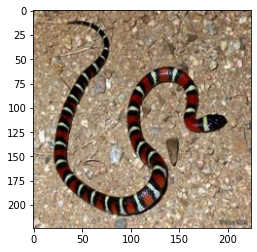

In [3]:
device = 'cpu'
img = Image.open('snake.jpg')
input_img = transform(img).to(device)
plt.imshow(img)

In [33]:
model_name = 'efficientnet_b0'
model = timm.create_model(model_name, pretrained=True).to(device).eval()
vis = GradCam(model)
cam, c = vis(input_img)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:974: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


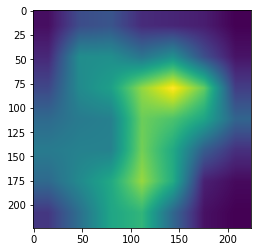

In [34]:
# heat map only
plt.imshow(cam)

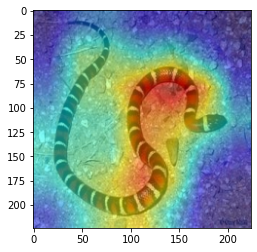

In [35]:
# over lap
out = image_with_colormap(img, cam)
plt.imshow(out)

In [36]:
model = timm.create_model(model_name, pretrained=True).to(device).eval()
vis = SaliencyMap(model, guided=True)
grad, c = vis(input_img)

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:974: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


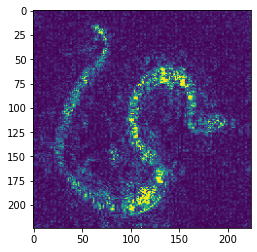

In [37]:
#guided back propagation
gbp = convert_to_grayscale(grad)
plt.imshow(gbp)

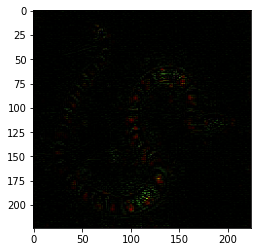

In [38]:
# positive 
pos, neg = get_positive_negative_saliency(grad)
plt.imshow(pos)

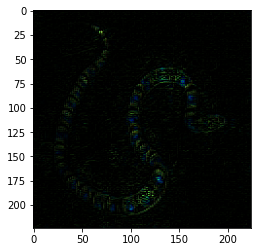

In [39]:
# positive 
pos, neg = get_positive_negative_saliency(grad)
plt.imshow(neg)

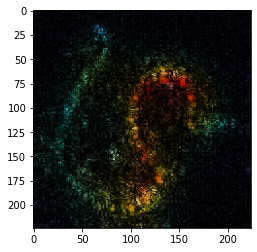

In [40]:
# guided grad-cam
plt.imshow(out * np.expand_dims(gbp, axis=2))